# Problem Statement
   Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like      Apple, Alienware, HP etc.
   He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things. 
   Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining. 
   To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.
Now he needs your (i.e Data Scientist’s) help to solve the following problem.

# Step- 1 (Data Analysis and Mining)
   Musk’s Requirements
   
     1.Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS,  etc. and get the price prediction. 
     2.Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.

# Sprint - 2 (ML Model Tuning)
  Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
  
     1.First try to check if the models you have created are a best fit or not. 
     2.See if applying cross validation helps improve your models performance.

In [1658]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1659]:
df=pd.read_csv('laptop_details.csv')
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [1660]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [1661]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [1662]:
df.shape


(720, 4)

In [1663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [1664]:
df.duplicated().sum()

297

In [1665]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

# MRP column need to be in numerical form

In [1666]:
df['MRP']=df['MRP'].str.replace('₹','')
df['MRP']=df['MRP'].str.replace(',','')

In [1667]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [1668]:
df['MRP'] = df['MRP'].astype('float64')

<AxesSubplot:xlabel='MRP', ylabel='Density'>

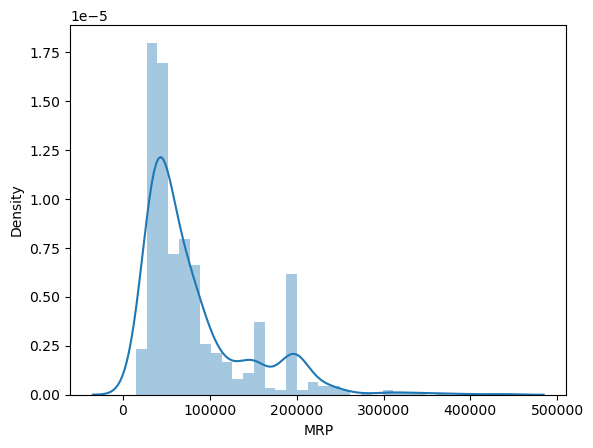

In [1669]:
sns.distplot(df['MRP'])

# Extracting Company, Processor, RAM, Storage

In [1670]:
import re

In [1671]:
df['Company']=df['Product'].apply(lambda x:" ".join(x.split()[0:1]))



In [1672]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [1673]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System']=df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System']=df['Operating System'].apply(lambda x: x.replace(" Operating System", ""))

In [1674]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [1675]:
regex = r'[\d]+\s(?:cm)'
df['Screen size']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Screen size']=df['Screen size'].apply(lambda x : ''.join(x))

In [1676]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

In [1677]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,256 GB SSD,56 cm,8 GB DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,512 GB SSD,62 cm,8 GB DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM


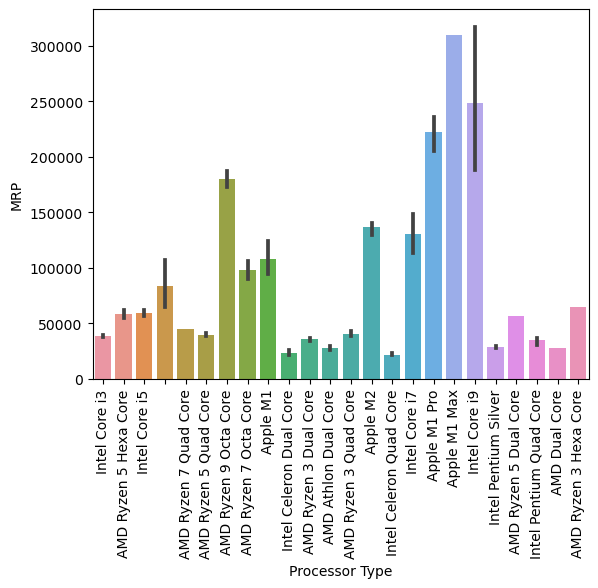

In [1678]:
sns.barplot(x=df['Processor Type'], y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

# Data Preprocessing and Cleaning


In [1679]:
df[df['Processor Type']=='']

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,38990.0,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL,,Windows 11,1 TB HDD256 GB SSD,62 cm,8 GB DDR4 RAM
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990.0,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,256 GB SSD,56 cm,8 GB DDR4 RAM
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990.0,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,256 GB SSD,56 cm,8 GB DDR4 RAM
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...,4.4,47990.0,Free upgrade to Windows 11 when availableAMD R...,acer,,64 bit Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM
53,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990.0,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,512 GB SSD,56 cm,8 GB DDR4 RAM
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,47990.0,Free upgrade to Windows 11 when availableIntel...,acer,,64 bit Windows 10,512 GB SSD,62 cm,8 GB DDR4 RAM
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...,4.6,70990.0,Processor: AMD Ryzen R5-5600H (3.30 GHz up to ...,DELL,,64 bit Windows 11,512 GB SSD,62 cm,16 GB DDR4 RAM
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990.0,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,,Windows 11,,56 cm,4 GB LPDDR4X RAM
94,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,4.2,30428.0,Processor: Intel PQC-N5030 (1.10 GHz up to 3.1...,DELL,,64 bit Windows 11,256 GB SSD,62 cm,8 GB DDR4 RAM
116,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990.0,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,512 GB SSD,56 cm,8 GB DDR4 RAM


In [1680]:
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'

In [1681]:
df['Processor Type']=df['Processor Type'].apply(lambda x:" ".join(x.split()[0:1]))

In [1682]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,64 bit Windows 11,256 GB SSD,56 cm,8 GB DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,64 bit Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,64 bit Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,64 bit Windows 10,512 GB SSD,62 cm,8 GB DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM


# Operating System Column

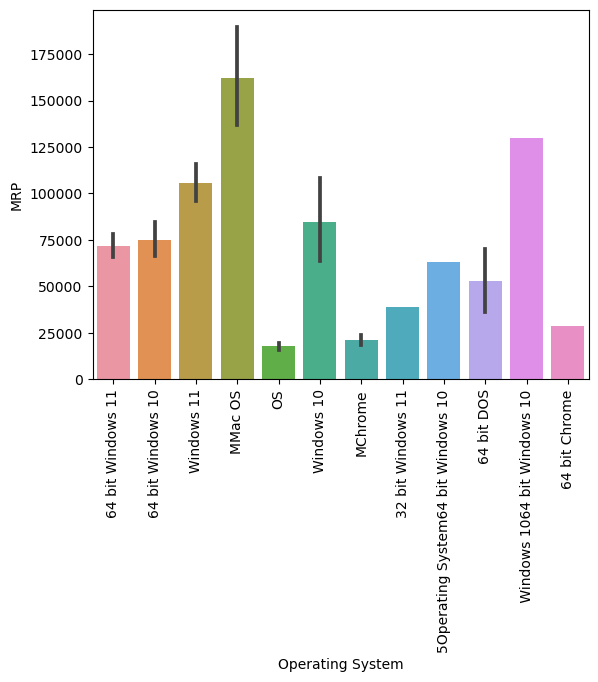

In [1683]:
sns.barplot(x=df['Operating System'], y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [1684]:
df['Operating System'].unique()

array(['64 bit Windows 11', '64 bit Windows 10', 'Windows 11', 'MMac OS',
       'OS', 'Windows 10', 'MChrome', '32 bit Windows 11',
       '5Operating System64 bit Windows 10', '64 bit DOS',
       ' Windows 1064 bit Windows 10', '64 bit Chrome'], dtype=object)

In [1685]:
df['Operating System'].replace({'MMac OS':'Mac', 'OS':'Mac', 'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                               ' Windows 1064 bit Windows 10':'Windows 10',
                               '64 bit Chrome':'Chrome'}, inplace=True)

df['Operating System']=df['Operating System'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ','').replace('64 bit ',''))
df['Operating System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome', 'DOS'], dtype=object)

# RAM column

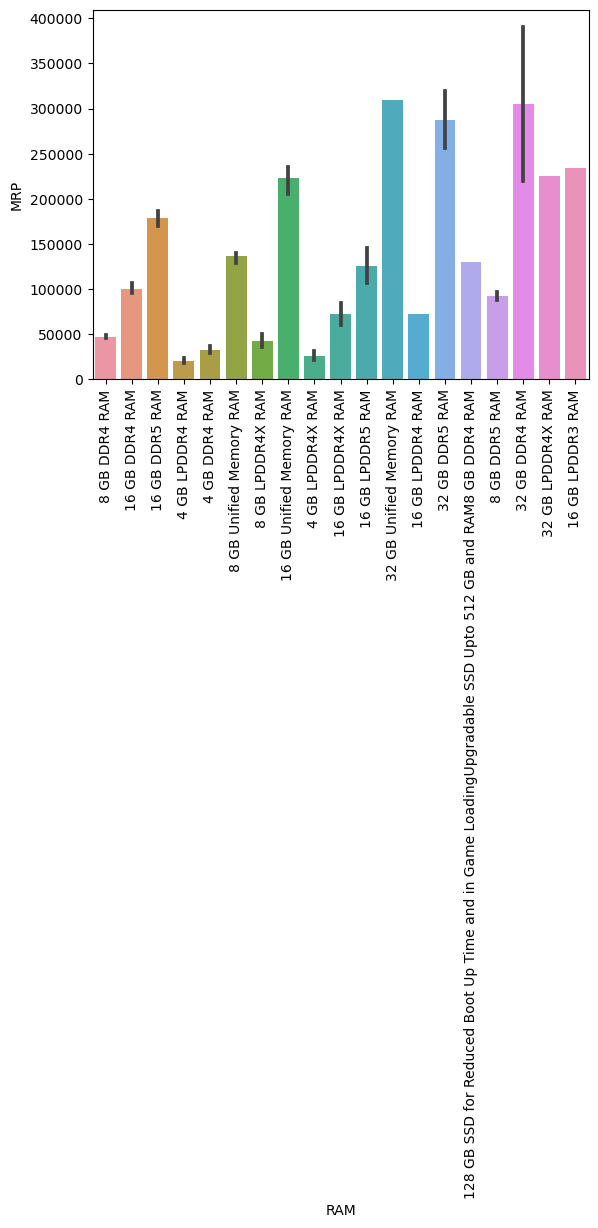

In [1686]:
sns.barplot(x=df['RAM'], y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [1687]:
df['RAM size']=df['RAM'].apply(lambda x:" ".join(x.split()[0:2]))

In [1688]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM,RAM size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,256 GB SSD,56 cm,8 GB DDR4 RAM,8 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB


In [1689]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [1690]:
df['RAM Type']=df['RAM'].apply(lambda x:" ".join(x.split()[2:3]))

In [1691]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM,RAM size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,256 GB SSD,56 cm,8 GB DDR4 RAM,8 GB,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,512 GB SSD,62 cm,8 GB DDR4 RAM,8 GB,DDR4


# Stotrage Type

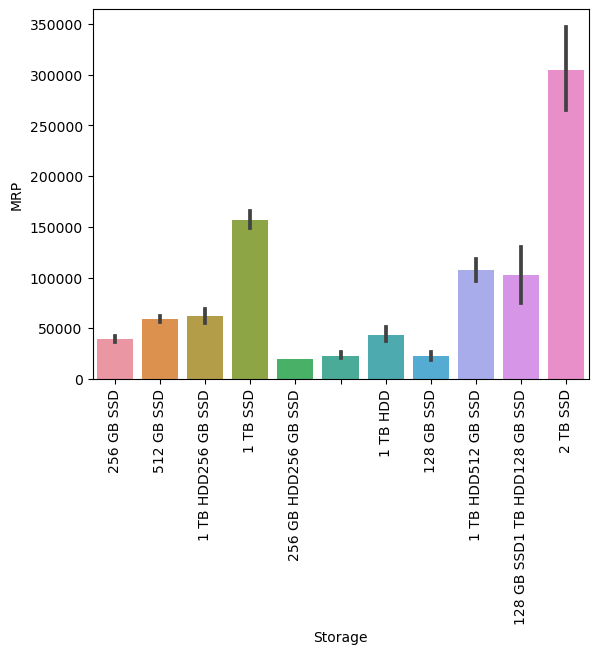

In [1692]:
sns.barplot(x=df['Storage'], y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [1693]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Storage,Screen size,RAM,RAM size,RAM Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990.0,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Qualcomm,Windows 11,,56 cm,4 GB LPDDR4X RAM,4 GB,LPDDR4X
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel,Chrome,,56 cm,4 GB DDR4 RAM,4 GB,DDR4
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel,Chrome,,56 cm,4 GB DDR4 RAM,4 GB,DDR4
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,,46 cm,4 GB LPDDR4 RAM,4 GB,LPDDR4
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,,62 cm,4 GB LPDDR4 RAM,4 GB,LPDDR4
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel,Windows 11,,46 cm,4 GB DDR4 RAM,4 GB,DDR4
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel,Windows 11,,46 cm,4 GB DDR4 RAM,4 GB,DDR4
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490.0,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Intel,Chrome,,46 cm,4 GB LPDDR4X RAM,4 GB,LPDDR4X
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,,56 cm,4 GB LPDDR4 RAM,4 GB,LPDDR4
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel,Chrome,,46 cm,4 GB LPDDR4 RAM,4 GB,LPDDR4


In [1694]:
df.iloc[83,7]='128GB EMMC'
df.iloc[89,7]='64GB EMMC'
df.iloc[96,7]='64GB EMMC'
df.iloc[345,7]='32GB EMMC'
df.iloc[509,7]='64GB EMMC'
df.iloc[544,7]='64GB EMMC'
df.iloc[559,7]='64GB EMMC'
df.iloc[632,7]='128GB EMMC'
df.iloc[695,7]='64GB EMMC'
df.iloc[715,7]='64GB EMMC'

In [1695]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '128GB EMMC', '64GB EMMC', '1 TB HDD',
       '128 GB SSD', '32GB EMMC', '1 TB HDD512 GB SSD',
       '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'], dtype=object)

In [1696]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [1697]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Screen size,RAM,RAM size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,56 cm,8 GB DDR4 RAM,8 GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,62 cm,8 GB DDR4 RAM,8 GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB DDR4 RAM,8 GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,62 cm,8 GB DDR4 RAM,8 GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB DDR4 RAM,8 GB,DDR4,512GB,SSD


In [1698]:
df.drop(['RAM'],axis=1, inplace=True)

In [1699]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,56 cm,8 GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,62 cm,8 GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD


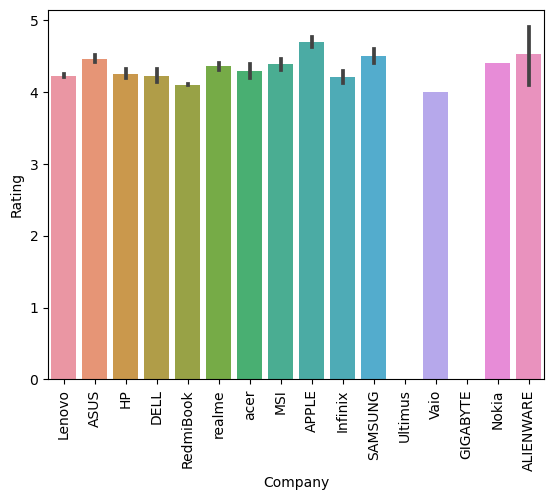

In [1700]:
sns.barplot(x=df['Company'], y=df['Rating'])
plt.xticks(rotation='vertical')
plt.show()

# Screen size column 

<AxesSubplot:>

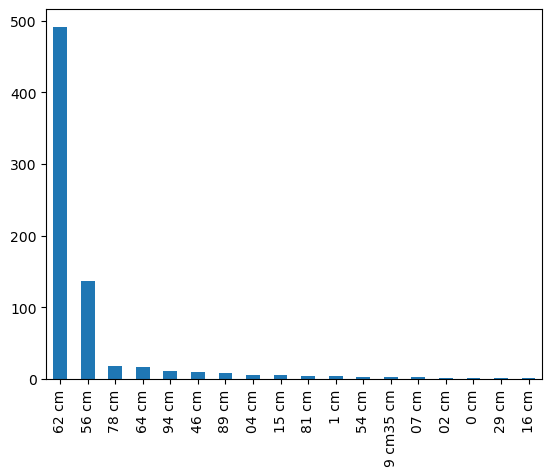

In [1701]:
df['Screen size'].value_counts().plot(kind='bar')

In [1702]:
len(df[df['Screen size']==''])

0

In [1703]:
df['Screen size'].replace("9 cm35 cm","35 cm", inplace=True)

In [1704]:
df['Screen size'].value_counts()

62 cm    492
56 cm    137
78 cm     18
64 cm     16
94 cm     11
46 cm      9
89 cm      8
04 cm      5
15 cm      5
81 cm      4
1 cm       4
54 cm      3
35 cm      2
07 cm      2
02 cm      1
0 cm       1
29 cm      1
16 cm      1
Name: Screen size, dtype: int64

In [1705]:
df.head()

,Product,Rating,MRP,Feature,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,56 cm,8 GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD,Windows 10,62 cm,8 GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD


In [1706]:
df.drop(['Product'], axis=1, inplace=True)

In [1707]:
df.drop(['Feature'], axis=1, inplace=True)
df.drop(['Rating'], axis=1, inplace=True)

In [1708]:
df.head()

,MRP,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,36990.0,Lenovo,Intel,Windows 11,56 cm,8 GB,DDR4,256GB,SSD
1,39990.0,Lenovo,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
2,32990.0,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
3,49990.0,HP,AMD,Windows 10,62 cm,8 GB,DDR4,512GB,SSD
4,49990.0,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD


In [1709]:
data=df.copy()

<AxesSubplot:>

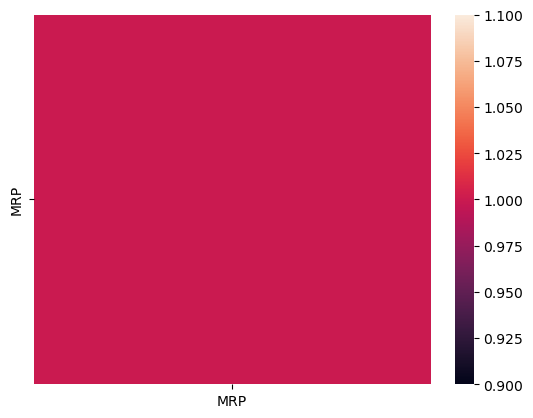

In [1710]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='MRP', ylabel='Density'>

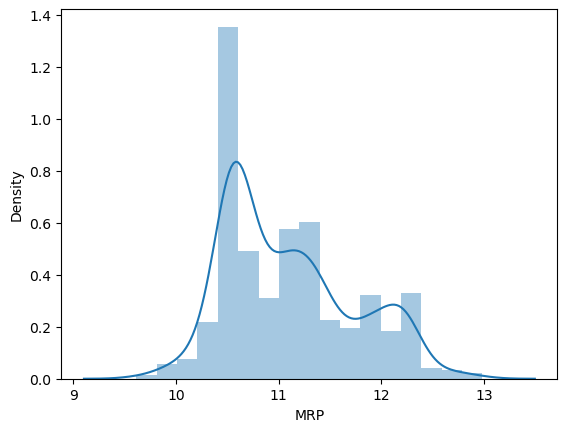

In [1711]:
sns.distplot(np.log(data['MRP']))

In [1712]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [1713]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [1714]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor

In [1715]:
def replace_company(company):
    if company=='Lenovo':
        return 1
    elif company =='ASUS':
        return 2
    elif company=='HP':
        return 3
    elif company=='DELL':
        return 4
    elif company=='RedmiBook':
        return 5
    elif  company=='realme':
        return 6
    elif  company=='acer':
        return 7
    elif company=='MSI':
        return 8
    elif company=='APPLE':
        return 9
    elif  company=='Infinix':
        return 10
    elif  company=='SAMSUNG':
        return 11
    elif  company=='Ultimus':
        return 12
    elif  company=='Vaio':
        return 13
    elif  company=='GIGABYTE': 
        return 14
    elif  company=='Nokia':
        return 15
    elif  company=='ALIENWARE':
        return 16
    
data['Company']=data['Company'].apply(replace_company)
data['Company'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [1716]:
data['Processor Type'].unique()

array(['Intel', 'AMD', 'Apple', 'Qualcomm'], dtype=object)

In [1717]:
def replace_processor(Processor_Type):
    if Processor_Type=='Intel':
        return 1
    elif Processor_Type=='AMD':
        return 2
    elif Processor_Type=='Apple':
        return 3
    elif Processor_Type=='Qualcomm':
        return 4
    
data['Processor Type']=data['Processor Type'].apply(replace_processor)
data['Processor Type'].unique()

array([1, 2, 3, 4], dtype=int64)

In [1718]:
data['Operating System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome', 'DOS'], dtype=object)

In [1719]:
def replace_os(os):
    if os=='Windows 11':
        return 1
    elif os=='Windows 10':
        return 2
    elif os=='Mac':
        return 3
    elif os=='Chrome':
        return 4
    elif os=='DOS':
        return 5
    
data['Operating System']=data['Operating System'].apply(replace_os)
data['Operating System'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [1720]:
data['RAM size'].unique()

array(['8 GB', '16 GB', '4 GB', '32 GB', '128 GB'], dtype=object)

In [1721]:
def replace_ram_size(ram_size):
    if ram_size=='8 GB':
        return 1
    elif ram_size=='16 GB':
        return 2
    elif ram_size=='4 GB':
        return 3
    elif ram_size=='32 GB':
        return 4
    elif ram_size=='128 GB':
        return 5

    
data['RAM size']=data['RAM size'].apply(replace_ram_size)
data['RAM size'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [1722]:
data['Disc Type'].unique()

array(['SSD', 'HDD', 'EMMC'], dtype=object)

In [1723]:
def replace_disc_type(disc_type):
    if disc_type=='SSD':
        return 1
    elif disc_type=='HDD':
        return 2
    elif disc_type=='EMMC':
        return 3

    
data['Disc Type']=data['Disc Type'].apply(replace_disc_type)
data['Disc Type'].unique()

array([1, 2, 3], dtype=int64)

In [1724]:
data['Disc Size'].unique()

array(['256GB', '512GB', '1TB', '128GB', '64GB', '32GB', '2TB'],
      dtype=object)

In [1725]:
def replace_disc_size(disc_size):
    if disc_size=='256GB':
        return 1
    elif disc_size=='512GB':
        return 2
    elif disc_size=='1TB':
        return 3
    elif disc_size=='128GB':
        return 4
    elif disc_size=='64GB':
        return 5
    elif disc_size=='32GB':
        return 6
    elif disc_size=='2TB':
        return 7
    
data['Disc Size']=data['Disc Size'].apply(replace_disc_size)
data['Disc Size'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [1726]:
data['RAM Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [1727]:
def replace_ram_type(ram_type):
    if ram_type=='DDR4':
        return 1
    elif ram_type=='DDR5':
        return 2
    elif ram_type=='LPDDR4':
        return 3
    elif ram_type=='Unified':
        return 4
    elif ram_type=='LPDDR4X':
        return 5
    elif ram_type=='LPDDR5':
        return 6
    elif ram_type=='LPDDR3':
        return 7
    
data['RAM Type']=data['RAM Type'].apply(replace_ram_type)
data['RAM Type'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [1728]:
data['Screen size']=data['Screen size'].apply(lambda x: x.replace("cm",""))

In [1729]:
data.head()

,MRP,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,36990.0,1,1,1,56,1,1,1,1
1,39990.0,1,1,1,62,1,1,2,1
2,32990.0,2,1,1,62,1,1,2,1
3,49990.0,3,2,2,62,1,1,2,1
4,49990.0,2,1,1,62,1,1,2,1


In [1768]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MRP               720 non-null    float64
 1   Company           720 non-null    int64  
 2   Processor Type    720 non-null    int64  
 3   Operating System  720 non-null    int64  
 4   Screen size       720 non-null    object 
 5   RAM size          720 non-null    int64  
 6   RAM Type          720 non-null    int64  
 7   Disc Size         720 non-null    int64  
 8   Disc Type         720 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 50.8+ KB


In [1770]:
data['Screen size'].astype('int32')

0      56
1      62
2      62
3      62
4      62
       ..
715    46
716    62
717    62
718    56
719    62
Name: Screen size, Length: 720, dtype: int32

In [1775]:
X=data.drop('MRP', axis=1).values
X

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 1],
       [2, 1, 1, ..., 1, 2, 1],
       ...,
       [2, 2, 1, ..., 2, 3, 1],
       [2, 1, 1, ..., 6, 2, 1],
       [1, 1, 2, ..., 1, 3, 2]], dtype=object)

In [1730]:
X=data.drop(columns=['MRP'])
y=np.log(df['MRP'])

In [1731]:
X

,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,1,1,1,56,1,1,1,1
1,1,1,1,62,1,1,2,1
2,2,1,1,62,1,1,2,1
3,3,2,2,62,1,1,2,1
4,2,1,1,62,1,1,2,1
...,...,...,...,...,...,...,...,...
715,2,1,4,46,3,3,5,3
716,1,2,1,62,1,1,2,1
717,2,2,1,62,2,2,3,1
718,2,1,1,56,2,6,2,1


In [1732]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
715    10.064330
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 720, dtype: float64

In [1733]:
std=StandardScaler()
X=std.fit_transform(X)

print(X)

[[-0.80688224 -0.87423048 -0.46911664 ... -0.42107258 -1.45873792
  -0.28058001]
 [-0.80688224 -0.87423048 -0.46911664 ... -0.42107258 -0.31711694
  -0.28058001]
 [-0.44104142 -0.87423048 -0.46911664 ... -0.42107258 -0.31711694
  -0.28058001]
 ...
 [-0.44104142  0.91906281 -0.46911664 ...  0.46281156  0.82450404
  -0.28058001]
 [-0.44104142 -0.87423048 -0.46911664 ...  3.99834813 -0.31711694
  -0.28058001]
 [-0.80688224 -0.87423048  1.21970327 ... -0.42107258  0.82450404
   2.69026717]]


In [1734]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(144, 8)
(144,)


# Machine Learning models

# Linear Regression

In [1735]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [1736]:
from sklearn.metrics import mean_squared_error as mse, r2_score

MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

results=pd.DataFrame({"Model":["Linear Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.33


# Decision Tree

In [1737]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [1738]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["Decision Tree Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.33
0,Decision Tree Regression,0.07,0.26,0.80


# Random Forest

In [1739]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1740]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["Random Forest Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results


,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.33
0,Decision Tree Regression,0.07,0.26,0.80
0,Random Forest Regression,0.06,0.24,0.83


# Gradient boosting

In [1741]:
from sklearn.ensemble import GradientBoostingRegressor

grb= GradientBoostingRegressor(n_estimators =100,random_state =0) 
grb.fit(x_train, y_train) 
y_pred = grb.predict(x_test)

In [1742]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["Gradient Boosting Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.33000
0,Decision Tree Regression,0.07,0.26,0.80000
0,Random Forest Regression,0.06,0.24,0.83000
0,Gradient Boosting Regression,0.05,0.22,0.84334


# ADA Boost

In [1743]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [1744]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["ADA Boost Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results


,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.330000
0,Decision Tree Regression,0.07,0.26,0.800000
0,Random Forest Regression,0.06,0.24,0.830000
0,Gradient Boosting Regression,0.05,0.22,0.843340
0,ADA Boost Regression,0.09,0.30,0.606637


# KNN Regressor



In [1745]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=3)
knn=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [1746]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["KNN Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})
results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.15,0.39,0.330000
0,Decision Tree Regression,0.07,0.26,0.800000
0,Random Forest Regression,0.06,0.24,0.830000
0,Gradient Boosting Regression,0.05,0.22,0.843340
0,ADA Boost Regression,0.09,0.30,0.606637
0,KNN Regression,0.10,0.32,0.740000


In [1747]:
gbr=GradientBoostingRegressor(learning_rate=0.15, n_estimators=50, random_state=42)

gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

print(mse(y_pred,y_test).round(2))
print(np.sqrt(mse(y_pred,y_test).round(2)))
print(((r2_score(y_pred, y_test))*100).round(2))

0.05
0.22360679774997896
83.57


In [1748]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

gbr=GradientBoostingRegressor(learning_rate=0.15, n_estimators=50, random_state=42)

k=ShuffleSplit(n_splits=20, test_size=0.2, random_state=20)
score=cross_val_score(gbr, X,y, cv=k)
print("Cross validations Score:\n", score)
print("Average Cross validations Score:", score.mean())
print("Maximum Cross validations Score:", score.max())
print("Minimum Cross validations Score:", score.min())

Cross validations Score:
 [0.88762039 0.82897312 0.88735719 0.89203602 0.87947257 0.89690618
 0.82638146 0.88781357 0.83696051 0.89488068 0.84909793 0.89553777
 0.90007362 0.87193734 0.8860545  0.88680048 0.83494007 0.87151684
 0.87428683 0.87498865]
Average Cross validations Score: 0.8731817862840991
Maximum Cross validations Score: 0.9000736223917988
Minimum Cross validations Score: 0.8263814610874254


In [1749]:
df.head()

,MRP,Company,Processor Type,Operating System,Screen size,RAM size,RAM Type,Disc Size,Disc Type
0,36990.0,Lenovo,Intel,Windows 11,56 cm,8 GB,DDR4,256GB,SSD
1,39990.0,Lenovo,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
2,32990.0,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD
3,49990.0,HP,AMD,Windows 10,62 cm,8 GB,DDR4,512GB,SSD
4,49990.0,ASUS,Intel,Windows 11,62 cm,8 GB,DDR4,512GB,SSD


In [1750]:
pd.options.display.max_columns=100

In [1751]:
data1=pd.get_dummies(data)
data1.head()

,MRP,Company,Processor Type,Operating System,RAM size,RAM Type,Disc Size,Disc Type,Screen size_0,Screen size_02,Screen size_04,Screen size_07,Screen size_1,Screen size_15,Screen size_16,Screen size_29,Screen size_35,Screen size_46,Screen size_54,Screen size_56,Screen size_62,Screen size_64,Screen size_78,Screen size_81,Screen size_89,Screen size_94
0,36990.0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,39990.0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,32990.0,2,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,49990.0,3,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,49990.0,2,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1752]:
X=data1.drop("MRP", axis=1).values
y=data1["MRP"].values

In [1763]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [1764]:

rf=RandomForestRegressor()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1755]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_pred,y_test))

0.8752827590078756


In [1762]:
gbr=GradientBoostingRegressor(max_depth=2, learning_rate=0.19)
gbr=gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
r2_score(y_pred,y_test)

0.8995979655624935

# Importing the model

In [1759]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [1761]:
X_train

array([[2, 2, 1, ..., 0, 0, 0],
       [3, 2, 1, ..., 0, 0, 0],
       [2, 2, 1, ..., 0, 0, 0],
       ...,
       [3, 1, 1, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       [1, 2, 2, ..., 0, 0, 0]], dtype=int64)

In [1783]:
df.drop('Screen size', axis=1, inplace=True)

In [1784]:
df.head()

,MRP,Company,Processor Type,Operating System,RAM size,RAM Type,Disc Size,Disc Type
0,36990.0,Lenovo,Intel,Windows 11,8 GB,DDR4,256GB,SSD
1,39990.0,Lenovo,Intel,Windows 11,8 GB,DDR4,512GB,SSD
2,32990.0,ASUS,Intel,Windows 11,8 GB,DDR4,512GB,SSD
3,49990.0,HP,AMD,Windows 10,8 GB,DDR4,512GB,SSD
4,49990.0,ASUS,Intel,Windows 11,8 GB,DDR4,512GB,SSD


In [1785]:
df.to_csv("laptop_price.csv", index=False)